In [1]:
import numpy as np
from scipy.special import erf
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import matrix_rank, inv
from pprint import pprint
import sys
import os
current_notebook_dir = os.getcwd()
# Replace with the path to your IT_PI.py function
project_root_dir = os.path.join(current_notebook_dir, '..', '..')
it_pi_module_dir = project_root_dir
sys.path.append(it_pi_module_dir)
import IT_PI
plt.rcParams['font.family'] = 'Times New Roman'  # Set the font to Times New Roman
plt.rcParams['text.usetex'] = True  # Use LaTeX for all text rendering/', VIEW.as_view(), name=''),
from sklearn.preprocessing import StandardScaler
from matplotlib.ticker import ScalarFormatter
from CHF_dimensional_matrix import get_data_and_dimensional_matrix
from sympy import Matrix


In [2]:
data, D_in, Bo_chf = get_data_and_dimensional_matrix()

In [3]:
data.drop(['CHF'], axis = 1, inplace = True)

In [4]:
#output_list = ["Phi"]
input_list = list(data.keys())
X = np.array(data[input_list])
Y = np.array(Bo_chf)
Y.reshape(-1, 1)

array([[0.00252646],
       [0.00234998],
       [0.00212478],
       ...,
       [0.00154013],
       [0.00188459],
       [0.00195833]], shape=(24579, 1))

In [5]:
#D_in = np.matrix([[ 2,  1,  0,  1, -3,  2,  2,  1,  1],
#        [-3, -1,  0,  0,  0, -2, -1,  0,  0],
#        [ 1,  0,  0,  0,  1,  0,  0,  0,  0],
#        [ 0,  0,  1,  0,  0, -1,  0,  0,  0]])
num_input      = 3

In [6]:
num_rows   = np.shape(D_in)[0]
num_cols   = np.shape(D_in)[1]
num_basis      = D_in.shape[1] -matrix_rank(D_in)
num_basis

np.int64(9)

In [7]:
print("Rank of D_in:", matrix_rank(D_in))
print("D_in matrix:\n", D_in)
num_rows   = np.shape(D_in)[0]
num_cols   = np.shape(D_in)[1]
num_basis      = D_in.shape[1] -matrix_rank(D_in)
basis_matrices = np.asmatrix(np.array([-np.array(wb) for wb in Matrix(D_in).nullspace()]), dtype = 'float') # vectores bases

Rank of D_in: 3
D_in matrix:
 [[ 1 -2  0  1 -3 -3 -3 -1  0  2  2  2]
 [ 0 -1  0 -2  0  0  0 -1 -2 -2 -2 -2]
 [ 0  1  0  0  1  1  1  1  1  0  0  0]]


In [8]:
#basis_matrices = basis_matrices.squeeze()
print(basis_matrices.shape)
print(X.shape)
print(Y.reshape(-1, 1).shape)
print(num_input)

(9, 12)
(24579, 12)
(24579, 1)
3


In [10]:
# Run dimensionless learning
results = IT_PI.main(
    X,
    Y.reshape(-1, 1),
    basis_matrices,
    num_input=num_input,
    estimator="binning",
    estimator_params={"num_bins": 50},
    popsize=3000,
    maxiter=50000,
    num_trials=50,
    seed=50
)




------------------------------------------------------------
num of parameters: 18

Using estimator: 'binning' with hyperparameters: {'num_bins': 50}

(1500_w,3000)-aCMA-ES (mu_w=756.3,w_1=0%) in dimension 18 (seed=50, Wed Oct 29 15:24:06 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1   3000 -5.355740537838027e-01 1.0e+00 1.13e+00  1e+00  1e+00 0:32.7
    2   6000 -6.493184551433204e-01 1.7e+00 1.50e+00  1e+00  1e+00 1:05.1
    3   9000 -6.734486356235596e-01 1.9e+00 1.83e+00  1e+00  1e+00 1:38.0
    4  12000 -7.166211382367145e-01 2.1e+00 2.17e+00  1e+00  1e+00 2:11.2
    5  15000 -9.656732025016677e-01 2.5e+00 2.48e+00  1e+00  1e+00 2:44.6
    6  18000 -1.037061493829961e+00 3.1e+00 2.86e+00  1e+00  1e+00 3:18.6
    7  21000 -9.003128454043470e-01 3.6e+00 3.17e+00  1e+00  1e+00 3:53.1
    8  24000 -9.794541988097052e-01 4.3e+00 3.49e+00  1e+00  1e+00 4:26.9
    9  27000 -1.062222625495831e+00 5.1e+00 3.63e+00  9e-01  1e+00 5:00.6
   10  30000 -1.0

In [9]:
# Run dimensionless learning
results = IT_PI.main(
    X,
    Y.reshape(-1, 1),
    basis_matrices,
    num_input=num_input,
    estimator="binning",
    estimator_params={"num_bins": 50},
    popsize=3000,
    maxiter=50000,
    num_trials=50,
    seed=50
)




------------------------------------------------------------
num of parameters: 27

Using estimator: 'binning' with hyperparameters: {'num_bins': 50}

(1500_w,3000)-aCMA-ES (mu_w=756.3,w_1=0%) in dimension 27 (seed=50, Thu Oct 30 10:08:20 2025)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1   3000 -6.221705741441275e-01 1.0e+00 1.06e+00  1e+00  1e+00 3:03.7
    2   6000 -1.067179786424504e+00 1.6e+00 1.50e+00  1e+00  1e+00 6:09.3
    3   9000 -1.100230422998264e+00 2.2e+00 1.89e+00  1e+00  1e+00 9:23.6
    4  12000 -1.261705761200638e+00 2.4e+00 2.28e+00  1e+00  1e+00 12:37.2
    5  15000 -1.466776790964202e+00 2.6e+00 2.65e+00  1e+00  1e+00 15:50.6
    6  18000 -1.551038514837730e+00 3.0e+00 3.06e+00  1e+00  1e+00 19:04.7
    7  21000 -1.599528563504387e+00 3.4e+00 3.44e+00  1e+00  1e+00 22:19.4
    8  24000 -1.816681428439553e+00 3.7e+00 3.88e+00  1e+00  1e+00 25:37.3
    9  27000 -1.762508746921885e+00 4.5e+00 4.23e+00  1e+00  1e+00 28:57.1
   10  3000

C:\Users\Termohidraulica\Documents\Repositorios\IT_PI\venv\lib\site-packages\cma\utilities\utils.py:362: UserWarning: 
        geno-pheno transformation introduced based on the
        current covariance matrix with condition 1.0e+12 -> 1.0e+00,
        injected solutions become "invalid" in this iteration (time=Oct 31 00:51:50 2025 class=CMAEvolutionStrategy method=alleviate_conditioning iteration=246)
  warnings.warn(msg + ' (time={}'.format(time.asctime()[4:]) +


  248 744000 -2.392145681001457e+00 1.4e+00 2.02e+05  1e+00  1e+00 890:36.2
  249 747000 -2.392145681001457e+00 1.7e+00 2.00e+05  1e+00  1e+00 894:10.0
termination on tolflatfitness=1
final/bestever f-value = -2.392146e+00 -2.392308e+00 after 747000/738544 evaluations
incumbent solution: [-0.57814705 -1.82850513 -1.08769283  1.14743012  1.70122239 -0.51943398
  1.58688537 -1.78180099 ...]
std deviations: [1.3077482  1.31927086 1.30831264 1.33333333 1.29900218 1.31222
 1.32567145 1.28168669 ...]
Optimized_params: [-0.57816291 -1.78836191 -1.07571384  1.05578841  1.72761734 -0.50630423
  1.58477957 -1.88460401 -1.78185188  0.00416978  0.67720317 -0.63203964
  0.48548949  1.19924866 -1.72663912  0.60864659  1.42945654  0.05926696
 -1.01703967 -0.65525016 -0.3581248   0.94613965  0.18000101 -0.10390018
  1.5272726  -1.16142685 -0.27625378]
Optimized_MI: -2.3923077223197424
------------------------------------------------------------
coef_pi: [[-0.11109583 -0.31145759  0.30678217 -0.7591434

ValueError: x and y must be the same size

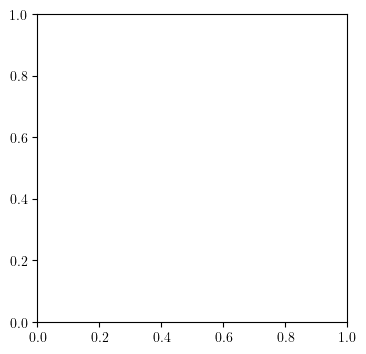

In [20]:
fig = plt.figure(figsize=(4, 4))
plt.scatter(input_PI,output_PI)
plt.xlabel(r" $\Pi^* $", fontsize=25, labelpad=8)  
plt.ylabel(r" $\Pi_{o}^*$", fontsize=25, labelpad=8)
#plt.xscale("log")
#plt.yscale("log")
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.tight_layout()
#fig.savefig("keyhole.pdf", format="pdf", bbox_inches="tight",transparent = "True")

In [10]:
input_PI = results["input_PI"]
output_PI = results["output_PI"]
epsilon  = results["irreducible_error"]
uq       = results["uncertainty"]

coef_pi_list     = results["input_coef"]
variables = input_list;

optimal_pi_lab   = IT_PI.create_labels(np.array(coef_pi_list).reshape(-1, len(variables)), variables)
for j, label in enumerate(optimal_pi_lab):
    print(f'Optimal_pi_lab[{j}] = {label}')
    
#input_PI[:, [0, 1]] = input_PI[:, [1, 0]]


Optimal_pi_lab[0] = $\frac{1-Xout^{0.31} \cdot rhof^{0.95} \cdot rhog^{0.57} \cdot sigma^{0.27} \cdot hg^{1.0} \cdot hfg^{0.95}}{Tube Diameter^{0.11} \cdot Mass Flux^{0.31} \cdot g^{0.76} \cdot rhof - rhog^{0.56} \cdot muf^{0.92} \cdot hf^{0.84}}$
Optimal_pi_lab[1] = $\frac{Tube Diameter^{0.26} \cdot g^{0.56} \cdot rhog^{0.37} \cdot sigma^{1.0}}{rhof^{0.39} \cdot rhof - rhog^{0.28} \cdot muf^{0.69} \cdot hf^{0.35} \cdot hg^{0.83} \cdot hfg^{0.03}}$
Optimal_pi_lab[2] = $\frac{Tube Diameter^{0.1} \cdot Mass Flux^{0.01} \cdot 1-Xout^{0.67} \cdot g^{0.05} \cdot rhof^{0.43} \cdot rhog^{0.23} \cdot sigma^{0.07} \cdot hg^{0.76} \cdot hfg^{0.18}}{rhof - rhog^{0.62} \cdot muf^{0.12} \cdot hf^{1.0}}$


In [11]:
results['input_coef'] #'input_coef_basis'

[array([[-0.11, -0.31,  0.31, -0.76,  0.95,  0.57, -0.56, -0.92,  0.27,
         -0.84,  1.  ,  0.95]]),
 array([[ 0.26,  0.  , -0.  ,  0.56, -0.39,  0.37, -0.28, -0.69,  1.  ,
         -0.35, -0.83, -0.03]]),
 array([[ 0.1 ,  0.01,  0.67,  0.05,  0.43,  0.23, -0.62, -0.12,  0.07,
         -1.  ,  0.76,  0.18]])]

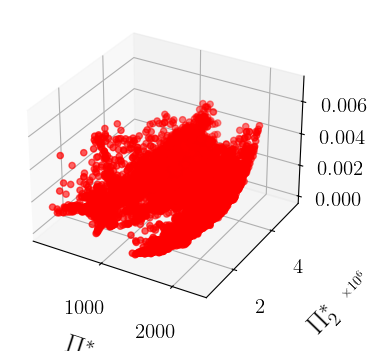

In [23]:
fig = plt.figure(figsize=(4, 4))
plt.rcParams['font.family'] = 'Times New Roman' 
plt.rcParams['text.usetex'] = True  
ax = fig.add_subplot(111, projection='3d')
ax.scatter(input_PI[:, 0].ravel(), input_PI[:, 1].ravel(), output_PI.ravel(), c='r', marker='o')
def prepare_label(label):
    if '$' in label:
        return r'{}'.format(label)
    return label
ax.set_xlabel(r'$\Pi_1^*$', fontsize=20, labelpad=20)  # Increase labelpad as needed
ax.set_ylabel(r'$\Pi_2^*$', fontsize=20, labelpad=25)
ax.set_zlabel(r'$C_f$', fontsize=15, labelpad=20)

ax.xaxis.set_tick_params(width=1, labelsize=15)
ax.yaxis.set_tick_params(width=1, labelsize=15)
ax.zaxis.set_tick_params(width=1, labelsize=15)
ax.tick_params(axis='both', which='major', labelsize=15, pad=10)
ax.grid(True)  
# plt.savefig('roughness_dimensionless.png', dpi=300, bbox_inches='tight')
# plt.savefig('roughness_dimensionless.eps', dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

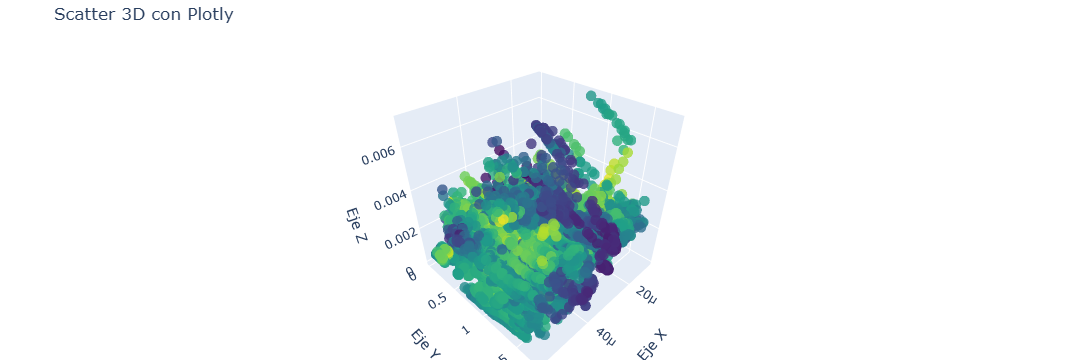

In [18]:
import plotly.graph_objects as go
# Crear figura 3D
fig = go.Figure(data=[go.Scatter3d(
    x=input_PI[:, 1].ravel().ravel() ,
    y=input_PI[:, 2].ravel().ravel() ,
    z=output_PI.ravel() ,
    mode='markers',
    marker=dict(
        size=6,
        color=input_PI[:, 0].ravel().ravel(),           # color según el valor de z
        colorscale='Viridis',
        opacity=0.8
    )
)])

# Configurar diseño
fig.update_layout(
    title='Scatter 3D con Plotly',
    scene=dict(
        xaxis_title='Eje X',
        yaxis_title='Eje Y',
        zaxis_title='Eje Z'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Mostrar figura
fig.show()

In [12]:
epsilon

[np.float64(1.2258006930488412),
 np.float64(0.9546994107351024),
 np.float64(0.9113638005655337),
 np.float64(1.2258006930488412)]

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (3,) and arg 1 with shape (4,).

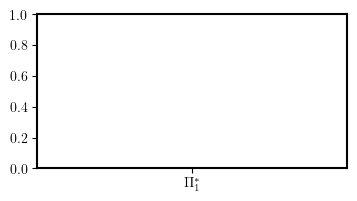

In [19]:
#exchange the first and the second value
epsilon[1],epsilon[0] = epsilon[0],epsilon[1]
uq[1],uq[0] = uq[0],uq[1]
x_labels = [r'$\Pi_1^*$', r'$\Pi_2^*$', r"$[\Pi_1^*,\Pi_2^*]$"]
plt.figure(figsize=(4, 2))
plt.rcParams['font.family'] = 'Times New Roman'  # Set the font to Times New Roman
plt.rcParams['text.usetex'] = True  # Use LaTeX for all text rendering
plt.gca().spines['top'].set_linewidth(1.5)
plt.gca().spines['bottom'].set_linewidth(1.5)
plt.gca().spines['left'].set_linewidth(1.5)
plt.gca().spines['right'].set_linewidth(1.5)

# Use uq_values as the error bars
plt.bar(x_labels, epsilon, yerr=uq, capsize=5, edgecolor='black',color = 'red')
plt.xticks(fontsize=25)
plt.yticks(fontsize=20)
plt.ylabel(r'$\tilde{\epsilon}_{L B}$', fontsize=25, labelpad=15)
plt.ylim([0, 1])
plt.savefig('Colebrook_rank.eps', dpi=300, bbox_inches='tight',transparent=True)
plt.show()

In [18]:
log_data         = np.log1p(input_PI)  # np.log1p is used to avoid log(0) issues
scaler          = StandardScaler()
scaled_log_data = scaler.fit_transform(log_data)
# Perform KMeans clustering on the scaled log-transformed data
regions                     = IT_PI.partition_space(scaled_log_data, n_clusters= 10)
results_region, ratio_X1, ratio_X2 = IT_PI.analyze_regions(input_PI[:,0], input_PI[:,1], Y, regions)

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

In [19]:
def plot_ratio_X1(X1, X2, ratio_X1):
    plt.figure(figsize=(4, 4))
    scatter = plt.scatter(X1, X2, c=ratio_X1, cmap='Blues', s=50, vmin=0, vmax=1) 
    plt.gca().spines['top'].set_linewidth(1.5)
    plt.gca().spines['bottom'].set_linewidth(1.5)
    plt.gca().spines['left'].set_linewidth(1.5)
    plt.gca().spines['right'].set_linewidth(1.5)
    plt.xlabel(r" $\Pi_{1}^*$", fontsize=25, labelpad=10)  
    plt.ylabel(r" $\Pi_2^*$", fontsize=25, labelpad=10)
    #plt.xscale('log')
    plt.xticks(fontsize=25)
    ax = plt.gca()
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_scientific(True)
    formatter.set_powerlimits((-3, -3))
    ax.yaxis.set_major_formatter(formatter)
    plt.yticks(fontsize=25)
    ax.yaxis.get_offset_text().set_fontsize(20)
    offset_text = ax.yaxis.get_offset_text()
    x, y = offset_text.get_position()  # current position
    offset_text.set_position((x , y+1.5))  # shift it slightly left

    cbar = plt.colorbar(scatter)
    cbar.set_label('$R_1$', fontsize=25)
    cbar.set_ticks([0, 0.25, 0.5, 0.75, 1])  # ✅ set tick locations
    cbar.set_ticklabels(['0', '0.25', '0.5', '0.75', '1'])  # ✅ set labels
    cbar.ax.tick_params(labelsize=25)  # ✅ set font size
    plt.xlim(10**(-3.5), np.max(X1))
    plt.ylim(0.0002, np.max(X2))
    #plt.savefig('roughness_region_1.png', dpi=300, bbox_inches='tight',transparent=True)
    plt.savefig('roughness_region_1.pdf', dpi=200, bbox_inches='tight',transparent=True)
    plt.show()
    
plot_ratio_X1(input_PI[:,0], input_PI[:,1], ratio_X1)


NameError: name 'ratio_X1' is not defined